## MLDA Workshop #4

(title)

Titanic: Machine Learning from Disaster [link to data on kaggle](https://www.kaggle.com/c/titanic/data)

In [1]:
# import some packages you learned in previous workshops
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Feature Engineering

In [5]:
# columns with missing values
print(train_data.columns[train_data.isnull().any()].tolist())
print(test_data.columns[test_data.isnull().any()].tolist())

['Age', 'Cabin', 'Embarked']
['Age', 'Fare', 'Cabin']


#### Pclass

In [6]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Sex

In [7]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
for dataset in [train_data, test_data]:
    dataset['Sex'] = dataset.Sex.map({'male':0, 'female':1}).astype(int)

#### Age - discretized

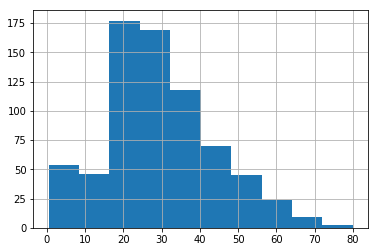

In [9]:
train_data.Age.hist()

In [10]:
train_data.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [11]:
for dataset in [train_data, test_data]:
    # fill in missing value
    age_avg = dataset.Age.mean()
    age_std = dataset.Age.std()
    
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = np.random.randint(age_avg - age_std, 
                                                                     age_avg + age_std, 
                                                                     size=dataset['Age'].isnull().sum())
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

#### SibSp&Parch - Combined and Discretized

In [12]:
train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [14]:
for dataset in [train_data, test_data]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']

#### Cabin - binarilized

In [15]:
train_data.Cabin.value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
F33                3
D                  3
E101               3
F2                 3
C22 C26            3
B35                2
D35                2
C2                 2
F4                 2
C124               2
B22                2
E33                2
E8                 2
B5                 2
C83                2
E121               2
C78                2
B20                2
C65                2
E24                2
B57 B59 B63 B66    2
C52                2
C93                2
B77                2
B18                2
C68                2
B58 B60            2
                  ..
B79                1
A34                1
B69                1
A14                1
D6                 1
F E69              1
C82                1
C111               1
C62 C64            1
B41                1
E10                1
C128               1
B4                 1
B101               1
B78                1
D47                1
B19          

In [16]:
for dataset in [train_data, test_data]:
    dataset['Has_Cabin'] = dataset['Cabin'].isna().tolist()

#### Fare - Discretized

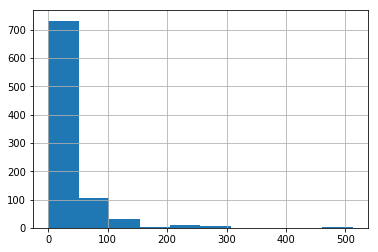

In [17]:
train_data.Fare.hist()

In [18]:
for dataset in [train_data, test_data]:
    dataset.loc[dataset['Fare'] <= 50, 'Fare'] = 0
    dataset.loc[dataset['Fare'] > 50, 'Fare'] = 1
    dataset.loc[np.isnan(dataset['Fare']), 'Fare'] = 0
    dataset['Fare'] = dataset['Fare'].astype(int)

#### Drop PassengerId, Name, Ticket, Cabin, SibSp, Parch, Embarked

In [19]:
drop_features = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Embarked']
for dataset in [train_data, test_data]:
    dataset.drop(drop_features, axis=1, inplace=True)

In [20]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Has_Cabin
0,0,3,0,1,0,1,True
1,1,1,1,2,1,1,False
2,1,3,1,1,0,0,True
3,1,1,1,2,1,1,False
4,0,3,0,2,0,0,True


In [21]:
test_data.head()

,Pclass,Sex,Age,Fare,FamilySize,Has_Cabin
0,3,0,2,0,0,True
1,3,1,2,0,1,True
2,2,0,3,0,0,True
3,3,0,1,0,0,True
4,3,1,1,0,2,True


## Decision Tree Classifier

In [22]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [23]:
train_features = train_data.drop(['Survived'], axis=1).values
train_labels = train_data['Survived']

dt_clf = tree.DecisionTreeClassifier(max_depth=3)
dt_clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## prediction submission

In [24]:
test_features = test_data.values

In [25]:
pred_labels = dt_clf.predict(test_features)

In [26]:
submission = pd.read_csv('./data/gender_submission.csv')
submission['Survived'] = pred_labels

In [27]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [28]:
submission.to_csv('submission.csv', index=False)

### ToDo
* Add slides for DT intro
* Add visual for DTC
* briefing to more advanced methods